In [246]:
import numpy as np
import cv2
import matplotlib
import seaborn as sn
from matplotlib import pyplot as plt
%matplotlib inline

In [247]:
img=cv2.imread('./images_dataset/virat_kohli/0b43460429.jpg')
img.shape

(900, 1200, 3)

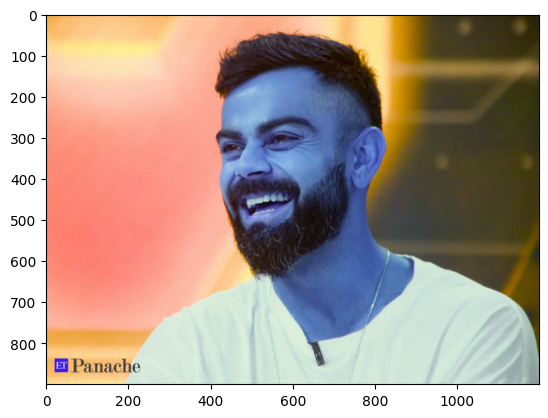

In [248]:
plt.imshow(img)

In [249]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(900, 1200)

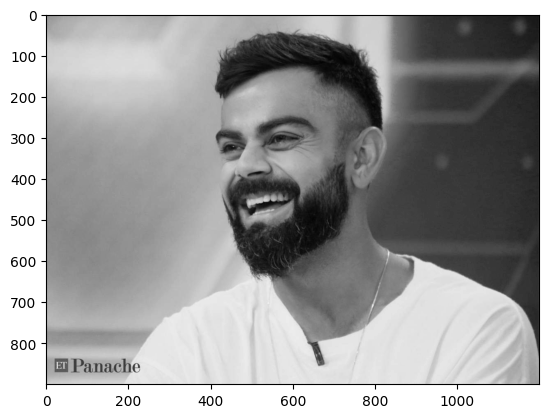

In [250]:
plt.imshow(gray, cmap='gray')

In [251]:
face_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[328, 163, 374, 374]])

In [252]:
(x,y,w,h)=faces[0]
x,y,w,h

(328, 163, 374, 374)

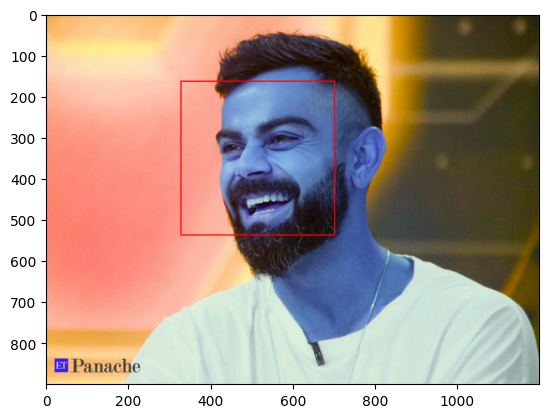

In [253]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

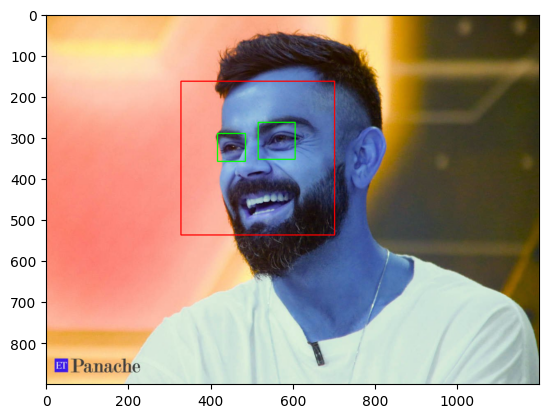

In [254]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
    plt.figure()
    plt.imshow(face_img,cmap='gray')
    plt.show

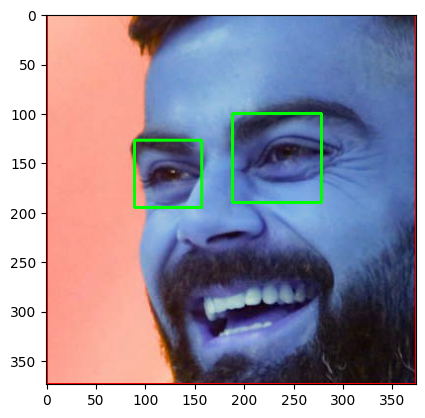

In [255]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [256]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

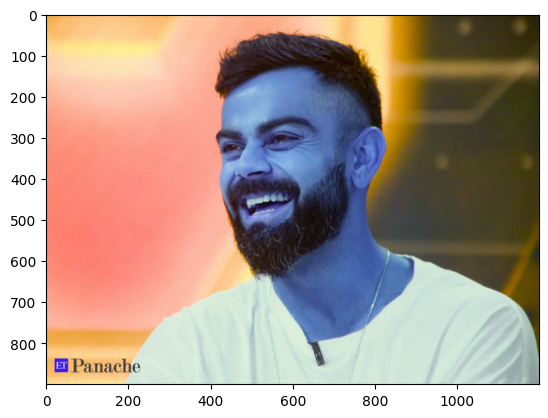

In [257]:
og_img=cv2.imread('./images_dataset/virat_kohli/0b43460429.jpg')
plt.imshow(og_img)

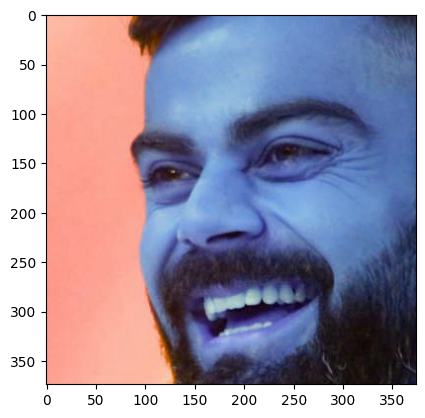

In [258]:
cropped_img=get_cropped_image_if_2_eyes('./images_dataset/virat_kohli/0b43460429.jpg')
plt.imshow(cropped_img)

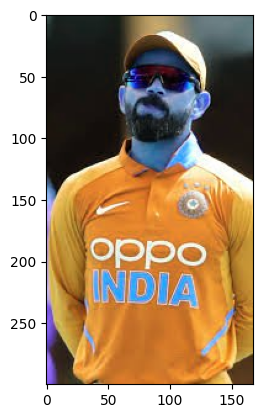

In [259]:
org_img=cv2.imread('./images_dataset/virat_kohli/5e51e39db9.jpg')
plt.imshow(org_img)

In [260]:
crop_no_2_eyes=get_cropped_image_if_2_eyes('./images_dataset/virat_kohli/5e51e39db9.jpg')
crop_no_2_eyes

In [261]:
path_to_data='./images_dataset/'
path_to_cr_data='./images_dataset/cropped/'

In [262]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [263]:
img_dirs

['./images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/virat_kohli']

In [264]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [265]:
cropped_img_dirs=[]
celebrity_file_name_dict={}
for img_dir in img_dirs:
    count=1
    celebrity_name=img_dir.split('/')[-1]
    celebrity_file_name_dict[celebrity_name]=[]
    print(celebrity_name)
    
    for entry in os.scandir(img_dir):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print('Generating cropped images in folder: ',cropped_folder)
                
            cropped_file_name=celebrity_name+str(count)+'.png'
            cropped_file_path=cropped_folder+'/'+cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count+=1

lionel_messi
Generating cropped images in folder:  ./images_dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./images_dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./images_dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./images_dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./images_dataset/cropped/virat_kohli


In [266]:
import pywt

def w2d(img,mode='haar',level=1):
    imArray=img
    imArray=cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)
    imArray=np.float32(imArray)
    imArray/=255;
    coeffs=pywt.wavedec2(imArray,mode,level)
    
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;
    
    imArray_H=pywt.waverec2(coeffs_H,mode);
    imArray_H*=255;
    imArray_H=np.uint8(imArray_H)
    
    return imArray_H

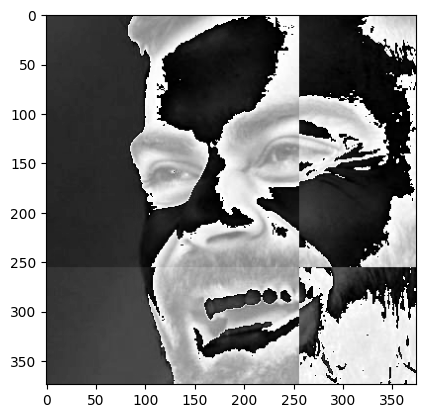

In [267]:
im_har=w2d(cropped_img,'db1',5)
plt.imshow(im_har,cmap='gray')

In [268]:
celebrity_file_name_dict

{'lionel_messi': ['./images_dataset/cropped/lionel_messi/lionel_messi1.png',
  './images_dataset/cropped/lionel_messi/lionel_messi2.png',
  './images_dataset/cropped/lionel_messi/lionel_messi3.png',
  './images_dataset/cropped/lionel_messi/lionel_messi4.png',
  './images_dataset/cropped/lionel_messi/lionel_messi5.png',
  './images_dataset/cropped/lionel_messi/lionel_messi6.png',
  './images_dataset/cropped/lionel_messi/lionel_messi7.png',
  './images_dataset/cropped/lionel_messi/lionel_messi8.png',
  './images_dataset/cropped/lionel_messi/lionel_messi9.png',
  './images_dataset/cropped/lionel_messi/lionel_messi10.png',
  './images_dataset/cropped/lionel_messi/lionel_messi11.png',
  './images_dataset/cropped/lionel_messi/lionel_messi12.png',
  './images_dataset/cropped/lionel_messi/lionel_messi13.png',
  './images_dataset/cropped/lionel_messi/lionel_messi14.png',
  './images_dataset/cropped/lionel_messi/lionel_messi15.png',
  './images_dataset/cropped/lionel_messi/lionel_messi16.png',
 

In [272]:
class_dict={'lionel_messi':0,'maria_sharapova':1,'roger_federer':2,'serena_williams':3,'virat_kohli':4}
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [273]:
x=[]
y=[]

for celebrity_name,training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        comb_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(comb_img)
        y.append(class_dict[celebrity_name])
        

In [276]:
len(x[0])

4096

In [277]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(163, 4096)

In [278]:
x[0]

array([100., 129., 140., ..., 193., 190., 188.])

In [279]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [281]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.8292682926829268

In [282]:
len(x_test)

41

In [283]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.89      0.73      0.80        11
           2       0.83      0.71      0.77         7
           3       0.60      0.75      0.67         4
           4       0.86      1.00      0.92        12

    accuracy                           0.83        41
   macro avg       0.81      0.81      0.80        41
weighted avg       0.84      0.83      0.83        41



In [284]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [286]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [288]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\Tanish Maheshwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Tanish Maheshwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Tanish Maheshwari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\T

,model,best_score,best_params
0,svm,0.827333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.663667,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.844667,{'logisticregression__C': 1}


In [289]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [290]:
best_estimators['svm'].score(x_test,y_test)

0.8780487804878049

In [291]:
best_estimators['random_forest'].score(x_test,y_test)

0.7073170731707317

In [293]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8292682926829268

In [294]:
best_clf=best_estimators['svm']

In [295]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[ 6,  0,  0,  1,  0],
       [ 1,  9,  1,  0,  0],
       [ 0,  1,  6,  0,  0],
       [ 1,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 12]], dtype=int64)

<Axes: >

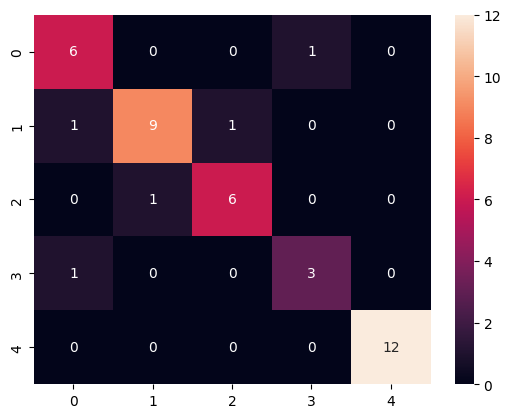

In [296]:
sn.heatmap(cm,annot=True)

In [300]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [301]:
import json
with open('class_dict.json','w') as f:
    f.write(json.dumps(class_dict))